In [3]:
#https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker/python
#https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/face_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Face_Landmarker.ipynb#scrollTo=tzXuqyIBlXer


from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [1]:
import cv2
#from google.colab.patches import cv2_imshow

img = cv2.imread("Images\WIN_20240624_21_26_25_Pro.jpg")

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

cv2.imshow("Image", img)

# Wait for a key press indefinitely or for a specified amount of time in milliseconds
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()

In [7]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("Images\WIN_20240624_21_26_25_Pro.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
#cv2.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# Display the image
cv2.imshow("Annotated Image", annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

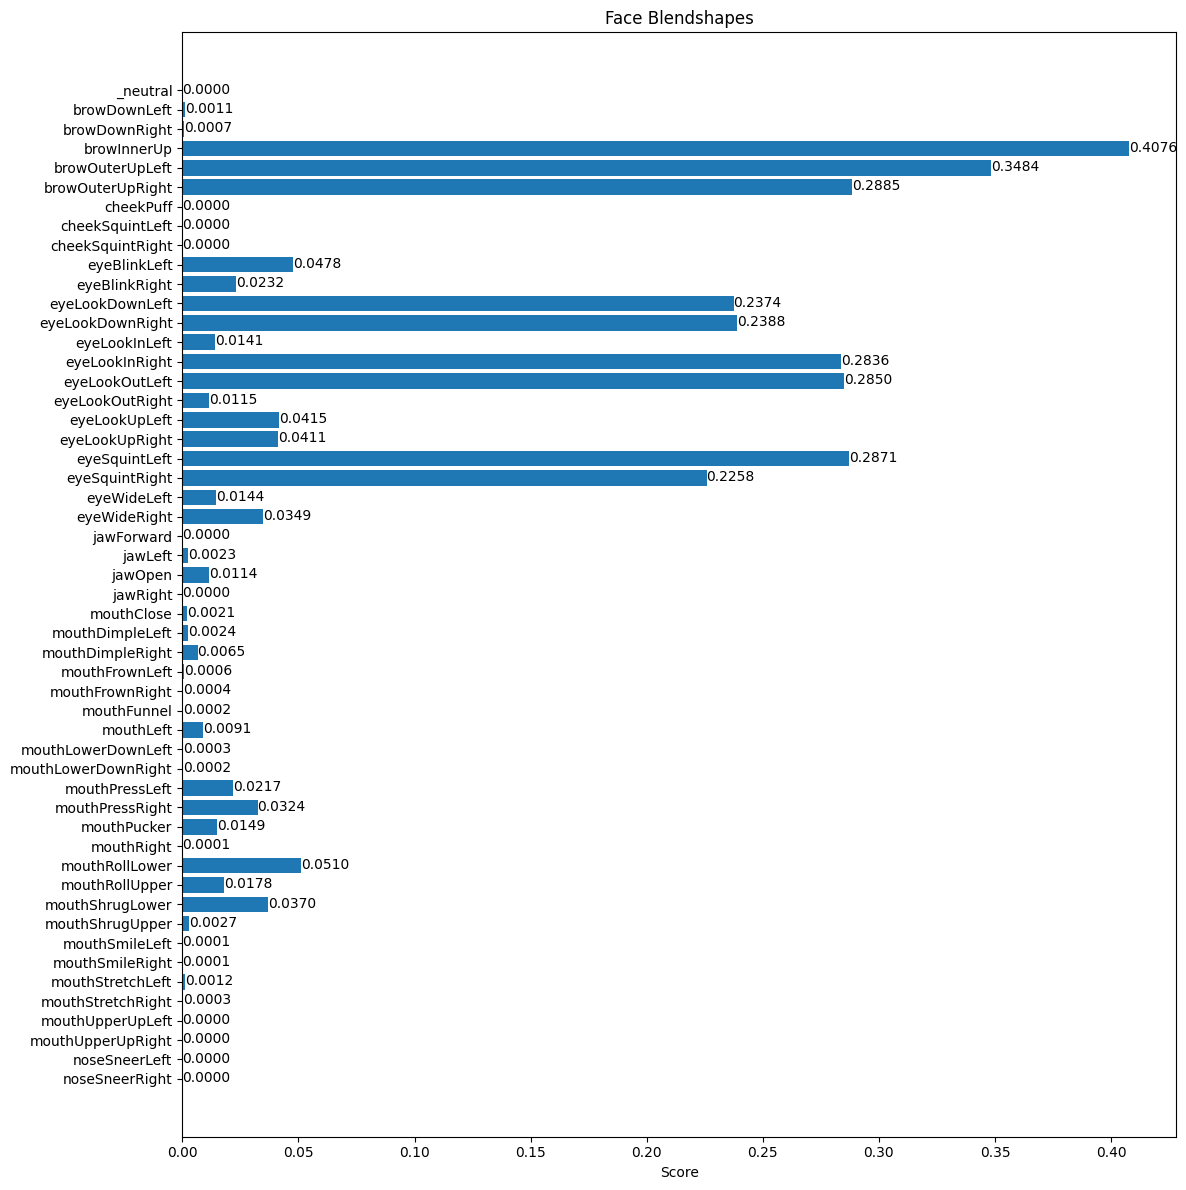

[array([[ 9.96112883e-01, -4.34997976e-02, -7.65918568e-02,
        -3.57572746e+00],
       [ 4.89705056e-02,  9.96269107e-01,  7.10603073e-02,
         5.85457897e+00],
       [ 7.32149780e-02, -7.45348781e-02,  9.94527042e-01,
        -4.40271072e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]


In [8]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])
print(detection_result.facial_transformation_matrixes)

In [9]:
detection_result.face_landmarks

[[NormalizedLandmark(x=0.4575904905796051, y=0.44783642888069153, z=-0.022014195099473, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.4531051218509674, y=0.39648449420928955, z=-0.03621656820178032, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.45507755875587463, y=0.41228264570236206, z=-0.020687459036707878, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.4464859068393707, y=0.35596752166748047, z=-0.023924265056848526, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.4524703919887543, y=0.3830787241458893, z=-0.037816811352968216, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.45221972465515137, y=0.36673450469970703, z=-0.03411908820271492, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.45186904072761536, y=0.32774245738983154, z=-0.012871517799794674, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.4082508683204651, y=0.32914993166923523, z=0.01846778206527233, visibility=0.0, presence=0.0),
  NormalizedLandmark(x=0.4509